# Sklearn
topics:

0. Scikit-Learn workflow
1. Getting ready with data
2. choose the right estimator/algorithm for our problems
3. Fit the model/algo and use it to make predictions on our data
4. evaluate a model
5. Improve model
6. save and load a trained model
7. Putting it all together.

# 0. Scikit-Learn workflow

## import numpy as np
import sklearn
sklearn.show_versions()

In [8]:
import pandas as pd
import numpy as np
heartd = pd.read_csv('data/heart-disease.xls')
heartd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Create X (featrue matrix)
X = heartd.drop("target", axis=1)

# Create y (labels)
y = heartd.target


# 2 Choose the right model and hyperparameters

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# 3. Fit the model of the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
# Make a prediction

# y_label = clf.predict(np.array([2,3,45])) # will give error
# only the correst shape of test data can work with test model

In [14]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [15]:
# 4. Evalaluate the model on training data and test data 
clf.score(X_train, y_train)*100

100.0

In [16]:
clf.score(X_test, y_test)*100

80.32786885245902

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.79      0.84      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [18]:
confusion_matrix(y_test, y_preds)

array([[23,  7],
       [ 5, 26]])

In [19]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [20]:
# Step 5 
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimator..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("" )

Trying model with 10 estimator..
Model accuracy on test set: 73.77%

Trying model with 20 estimator..
Model accuracy on test set: 80.33%

Trying model with 30 estimator..
Model accuracy on test set: 78.69%

Trying model with 40 estimator..
Model accuracy on test set: 80.33%

Trying model with 50 estimator..
Model accuracy on test set: 78.69%

Trying model with 60 estimator..
Model accuracy on test set: 77.05%

Trying model with 70 estimator..
Model accuracy on test set: 80.33%

Trying model with 80 estimator..
Model accuracy on test set: 81.97%

Trying model with 90 estimator..
Model accuracy on test set: 75.41%



In [21]:
# 6. Save a model and load it
import pickle 
pickle.dump(clf,open("random_forest_model_1.pkl", "wb"))

In [22]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7540983606557377

## Getting our data ready for ML

Three main setps:

    1. Split the data into features and labels  (usually `X` and `y`).
    2. Filling (also called imputing) or disregarding missing values.
    3. Converting non-numerical values to numerical values(also called features encoding). 

In [23]:
heartd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X = heartd.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y= heartd.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
# Row and Column
X.shape

(303, 13)

In [29]:
len(heartd)

303

In [30]:
# 80% learning data rest 20 training
len(heartd)*0.8

242.4

# Data cleaning and converting into numbers

In [31]:
sales = pd.read_csv("data/car-sales-extended.xls")
sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [32]:
len(sales)

1000

In [33]:
sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [34]:
# Spliting into X/y
X= sales.drop("Price", axis=1)
y = sales.Price 

#Split into training and testing
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
# Building ML model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_train, y_train)

In [36]:
# Turning categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical features
cf = ["Make","Colour","Doors"]
# One_hot 
oh = OneHotEncoder()
# transformer
tf  = ColumnTransformer([("oh",oh,
                                  cf)],
                                remainder="passthrough")

tfx = tf.fit_transform(X)
tfx

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
# ALternative to make text into numbers 
# dummies = pd.get_dummies(sales[["Make","Colour","Doors"]])
#dummies


In [38]:
pd.DataFrame(tfx)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [39]:
# Let's refit the model 
np.random.seed(42)
X_train, X_test, y_train,y_test = train_test_split(tfx, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there were missing values/data
    1. Fill them with some values(also called Imputation)
    2. Remove the samples with missing data altogether.
    

In [41]:
# Import missing data
msales = pd.read_csv("data/car-sales-extended-missing-data.xls")
msales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
msales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
X = msales.drop("Price",axis=1)
y =msales.Price

In [44]:
# Turning categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical features
cf = ["Make","Colour","Doors"]
# One_hot 
oh = OneHotEncoder()
# transformer
tf  = ColumnTransformer([("oh",oh,
                                  cf)],
                                remainder="passthrough")

tfx = tf.fit_transform(X)
tfx

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### option 1: Filling missing data with pandas

In [45]:
# Fill the "Make" column
msales["Make"].fillna("missing", inplace=True)

# Fill the "Color" Column
msales["Colour"].fillna("missing",inplace= True)
# Fill the "Color" Column
msales["Odometer (KM)"].fillna(msales["Odometer (KM)"].mean(), inplace= True )

# Fill the "Color" Column
msales["Doors"].fillna(4 ,inplace= True) 

/tmp/ipykernel_177797/3174198706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  msales["Make"].fillna("missing", inplace=True)
/tmp/ipykernel_177797/3174198706.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [46]:
msales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove rows Price with missing values
msales.dropna(inplace=True)

In [48]:
msales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
X = msales.drop("Price",axis=1)
y =msales.Price

In [50]:
# Turning categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical features
cf = ["Make","Colour","Doors"]
# One_hot 
oh = OneHotEncoder()
# transformer
tf  = ColumnTransformer([("oh",oh,
                                  cf)],
                                remainder="passthrough")

tfx = tf.fit_transform(msales)
tfx

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Option2. Fill missing data with Sklearn

In [51]:
msales = pd.read_csv("data/car-sales-extended-missing-data.xls")
msales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
msales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# drop the rows with NA values
msales = msales.dropna(subset= ["Price"])
msales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
X = msales.drop("Price", axis =1)
y = msales.Price

In [55]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with `missing` & numerical with mean
# Cat_imputer (ci)
ci = SimpleImputer(strategy= "constant", fill_value="missing")

# door_imputer (di)
di = SimpleImputer(strategy="constant", fill_value=4 )

# num_imputer (ni)
ni = SimpleImputer(strategy="mean")


In [56]:
# Define Columns
# Cat_features
cf = ["Make","Odometer (KM)"]
# door_features 
df = ["Doors"]
# Num_features
nf= ["Odometer (KM)"]

In [57]:
# Create an imputer (Somethings that fills data)
imputer = ColumnTransformer([
    #to use it late we need to use the name inside `""`
    ("cat_imputer", ci, cf),
    ("door_imputer", di, df),
    ("num_imputer", ni,nf)
])

In [58]:
# Transform the data
TX= imputer.fit_transform(X)
TX

array([['Honda', 35431.0, 4.0, 35431.0],
       ['BMW', 192714.0, 5.0, 192714.0],
       ['Honda', 84714.0, 4.0, 84714.0],
       ...,
       ['Nissan', 66604.0, 4.0, 66604.0],
       ['Honda', 215883.0, 4.0, 215883.0],
       ['Toyota', 248360.0, 4.0, 248360.0]], dtype=object)

In [59]:
# Create df
fsales =  pd.DataFrame(TX, columns= ["Make", "Colour", "Doors", "Odometer (KM)"])
fsales

,Make,Colour,Doors,Odometer (KM)
0,Honda,35431.0,4.0,35431.0
1,BMW,192714.0,5.0,192714.0
2,Honda,84714.0,4.0,84714.0
3,Toyota,154365.0,4.0,154365.0
4,Nissan,181577.0,3.0,181577.0
...,...,...,...,...
945,Toyota,35820.0,4.0,35820.0
946,missing,155144.0,3.0,155144.0
947,Nissan,66604.0,4.0,66604.0
948,Honda,215883.0,4.0,215883.0


In [60]:
fsales.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [61]:
fsales.dtypes

Make             object
Colour           object
Doors            object
Odometer (KM)    object
dtype: object

In [62]:
fsales.Make = fsales.Make.astype(str)
fsales.Colour = fsales.Colour.astype(str)

In [63]:
# Turning categories into numbers
from sklearn.preprocessing import OneHotEncoder
# For changing the range of data, manupulating outliers with mean, standard deviation
from sklearn.compose import ColumnTransformer

# Categorical features
cf = ["Make","Colour","Doors"]
# One_hot 
oh = OneHotEncoder()
# transformer
tf  = ColumnTransformer([("oh",oh, cf)],
                                remainder="passthrough")

tfx = tf.fit_transform(fsales)
tfx

<950x910 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [64]:
# Now we got our data as numbers & filled missing values

#let's fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfx, y, test_size= 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.264973444806447

### filling missing values = Imputation
### Non-numerical to numerical = Feature engineering/ encoding

# 2. Choosing the right estimator/algorithm for your problem
Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
     * Sometimes you'll see clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

  If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [65]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [66]:
# Store dictionary into dataframe

home = pd.DataFrame(housing["data"], columns = housing["feature_names"])
home

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
# actual target
home["MedHouseVal"] = housing["target"]
home.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
home["target"] = housing["target"]
home

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [69]:
# dropping `MedHouseVal`
home = home.drop("MedHouseVal", axis= 1)
home

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [70]:
from sklearn.linear_model import Ridge
# Import algo 
np.random.seed(42)
# Splitting our data set
X = home.drop("target", axis=1)
y = home.target # Median price of home is $100,000s

# Split data into training and testing 
xtr,  xte, ytr, yte = train_test_split(X, y, test_size = 0.2)

# Instatiate and fit the model (on the training set)
model = Ridge()
model.fit(xtr, ytr)

# Checking the score of the model (on the test set)

model.score(xte, yte)

0.5758549611440131

In [71]:
from sklearn import linear_model
# Import algo 
np.random.seed(42)
# Splitting our data set
X = home.drop("target", axis=1)
y = home.target # Median price of home is $100,000s

# Split data into training and testing 
xtr,  xte, ytr, yte = train_test_split(X, y, test_size = 0.2)

# Instatiate and fit the model (on the training set)
model = linear_model.LassoLars()
model.fit(xtr, ytr)

# Checking the score of the model (on the test set)

model.score(xte, yte)

0.28416537340669845

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [72]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor 

# setting up the seed 
np.random.seed(42)

# Splitting our data set
X = home.drop("target", axis=1)
y = home.target # Median price of home is $100,000s

# Split data into training and testing 
xtr,  xte, ytr, yte = train_test_split(X, y, test_size = 0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(xtr, ytr)

# Checking the score of the model (on the test set)

model.score(xte, yte)

0.8066196804802649

# 2.2 Choose an estimator for a classification problem
map link: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [73]:
# heart disease = hd
hd = pd.read_csv("data/heart-disease.xls")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
len(hd)

303

In [75]:
# choosing model
from sklearn import svm

np.random.seed(42)

# dividing features and target
X = hd.drop("target", axis=1)
y = hd.target

#splitting dataset 
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2)

# declaring model and selecting it
svc= svm.SVC()
svc.fit(xtr, ytr)

#score 
svc.score(xte, yte)


0.7049180327868853

In [76]:
# choosing model
from sklearn.svm import LinearSVC

np.random.seed(42)

# dividing features and target
X = hd.drop("target", axis=1)
y = hd.target

#splitting dataset 
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2)

# declaring model and selecting it
svc= LinearSVC()
svc.fit(xtr, ytr)

#score 
svc.score(xte, yte)

/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [77]:
# choosing model
from sklearn.neighbors import KNeighborsClassifier

#np.random.seed(42)

# dividing features and target
X = hd.drop("target", axis=1)
y = hd.target

#splitting dataset 
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2)

# declaring model and selecting it
svc= KNeighborsClassifier()
svc.fit(xtr, ytr)

#score 
svc.score(xte, yte)

0.5573770491803278

In [78]:
# Import the RRandomForestClassifier model class from the ensemble module 
from sklearn.ensemble import RandomForestClassifier

# setting up the seed 
np.random.seed(42)

# Splitting our data set
X = hd.drop("target", axis=1)
y = hd.target 

# Split data into training and testing 
xtr,  xte, ytr, yte = train_test_split(X, y, test_size = 0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestClassifier()
model.fit(xtr, ytr)

# Checking the score of the model (on the test set)

model.score(xte, yte)

0.8524590163934426

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

# 3. Fitting our data to make prediction
### 3.1 Fitting the model to the data 
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [79]:
# Import the RRandomForestClassifier model class from the ensemble module 
from sklearn.ensemble import RandomForestClassifier

# setting up the seed 
np.random.seed(42)

# Splitting our data set
X = hd.drop("target", axis=1)
y = hd.target 

# Split data into training and testing 
xtr,  xte, ytr, yte = train_test_split(X, y, test_size = 0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestClassifier()

# Fit the model to the data (Training machine learning model)
model.fit(xtr, ytr)

# Checking the score of the model (on the test set)

model.score(xte, yte)

0.8524590163934426

### Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using.

* Random Forest Wikipedia
* Random Forest Wikipedia (simple version)
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen

## 3.2 Making prediction using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba`

In [80]:
# Use a trained model to predict
# model.predict(np.array([2,234,4,1,123,123,2,3,23,3,2,32,35]))

output = ''' ValueError: Expected 2D array, got 1D array instead:
array=[  2. 234.   4.   1. 123. 123.   2.   3.  23.   3.   2.  32.  35.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.'''
print(output)

 ValueError: Expected 2D array, got 1D array instead:
array=[  2. 234.   4.   1. 123. 123.   2.   3.  23.   3.   2.  32.  35.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [81]:
xte.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [82]:
model.predict(xte)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [83]:
np.array([yte])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [84]:
# Compare predictions to truth labels to evaluate the moidel 
predict = model.predict(xte)
np.mean(predict == yte)

0.8524590163934426

In [85]:
model.score(xte,yte)

0.8524590163934426

In [86]:
from sklearn.metrics import accuracy_score
# accu_score(y_test, models prediction )
accuracy_score(yte, predict)

0.8524590163934426

### 3.2.2 Make prediction with `predict_proba`


In [87]:
model.predict_proba(xte[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [88]:
model.predict(xte[:5])

array([0, 1, 1, 0, 1])

In [89]:
# Import the RRandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# setting up the seed 
np.random.seed(42)

# Splitting our data set
X = home.drop("target", axis=1)
y = home.target 

# Split data into training and testing 
xtr,  xte, ytr, yte = train_test_split(X, y, test_size = 0.2)

# Instatiate and fit the model (on the training set)
model = RandomForestRegressor()

# Fit the model to the data (Training machine learning model)
model.fit(xtr, ytr)

# Predicting the heart desease (on the test set)
pred = model.predict(xte)

In [90]:
pred

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [91]:
np.array([yte])

array([[0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ]])

In [92]:
len(pred), len(yte)

(4128, 4128)

In [93]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yte,pred) 

0.3265721842781009

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the `score` method

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X= hd.drop("target", axis=1)
y = hd.target

# Split the data
xtr, xte, ytr, yte = train_test_split(X, y, test_size= 0.2)

# Random forest 
clf = RandomForestClassifier(n_estimators=20)

# Fit the model in the instance
clf.fit(xtr, ytr)

 

RandomForestClassifier(n_estimators=20)

In [95]:
clf.score(xtr, ytr)

1.0

In [96]:
clf.score(xte, yte )

0.8688524590163934

### Evaluating a regressor model

In [97]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Make the data
X= home.drop("target", axis=1)
y = home.target

# Split the data
xtr, xte, ytr, yte = train_test_split(X, y, test_size= 0.2)

# Random forest 
reg = RandomForestRegressor()

# Fit the model in the instance
reg.fit(xtr, ytr)

 

RandomForestRegressor()

In [98]:
reg.score(xtr, ytr)

0.9736828565983116

In [99]:
reg.score(xte, yte)

0.8066196804802649

### 4.2 Evaluating a model using the `scoring` parameter

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Declaring Input % output set
X = hd.drop("target" , axis=1)
y = hd.target

# Splitting data
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2)

# instancizing model
clf = RandomForestClassifier()

# Training model
clf.fit(xtr,ytr);

In [101]:
clf.score(xte,yte)

0.8524590163934426

In [102]:
# Breaks down the sample into more smaller parts and then tests it
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [103]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [104]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(xte,yte)

# Mean of 5-fold cross validation
clf_cross_val_score = np.mean(cross_val_score(clf, X,y))

# Comparing the two
clf_single_score, clf_cross_val_score 

(0.8524590163934426, 0.8248087431693989)

In [105]:
# Default scoring parameter of classifier 
# clf.score()

In [106]:
# Scoring parameter set to NONE by default
cross_val_score(clf, X, y, scoring =None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

 ### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Declaring Input % output set
X = hd.drop("target" , axis=1)
y = hd.target

# instancizing model
clf = RandomForestClassifier()
cv = cross_val_score(clf,X,y)
cv

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [108]:
# Mean of cross-validaiton score
mcv= np.mean(cv)

In [109]:
print(f"Heart disease clf cross-validation accuracy: {mcv*100:.2f}%")

Heart disease clf cross-validation accuracy: 82.48%


# Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [110]:
# X Creating test train split 
#np.random.seed(42)
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2)

In [111]:
from sklearn.metrics import roc_curve

# Fit the model 
clf.fit(xtr, ytr)
# Make predictions with probabilities 
proby = clf.predict_proba(xte)
proby[:5], len(proby)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57]]),
 61)

In [112]:
proby_positive = proby[:, 1]
proby_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [113]:
# Calculate fpr, tpr & thresholds
fpr, tpr, threshold = roc_curve(yte, proby_positive)

# Check for false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

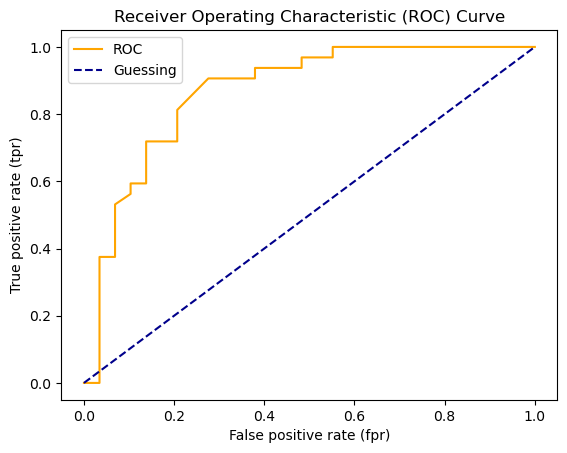

In [114]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
     Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # plot ROC curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
     # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr, tpr)

In [115]:
from sklearn.metrics import roc_auc_score

roc_auc_score(yte, proby_positive) 

0.8669181034482759

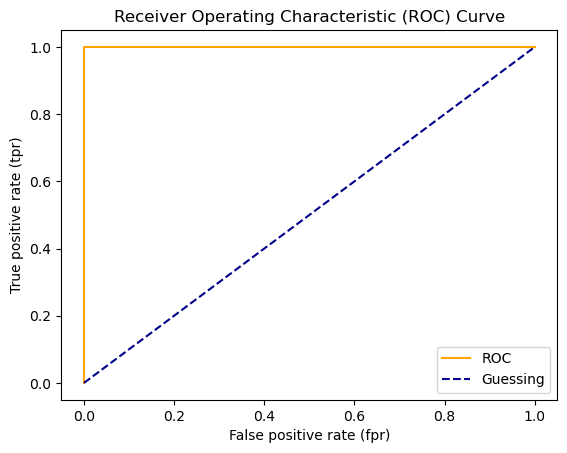

In [116]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yte, yte)
plot_roc_curve(fpr, tpr)

In [117]:
# Perfect AUC score
roc_auc_score(yte, yte)

1.0

# Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> **Note:** Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:
```python
import sklearn
sklearn.__version__
```
> If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

In [118]:
from sklearn.metrics import confusion_matrix
# Y predict = predy
predy = clf.predict(xte)

confusion_matrix(yte, predy)

array([[23,  6],
       [ 6, 26]])

In [119]:
# Visualiuse confusion matrix with pd.crosstab()
pd.crosstab(yte, predy,
            rownames= ["Actual Labels"],
           colnames = ["Predicted Labels"]
           )


Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


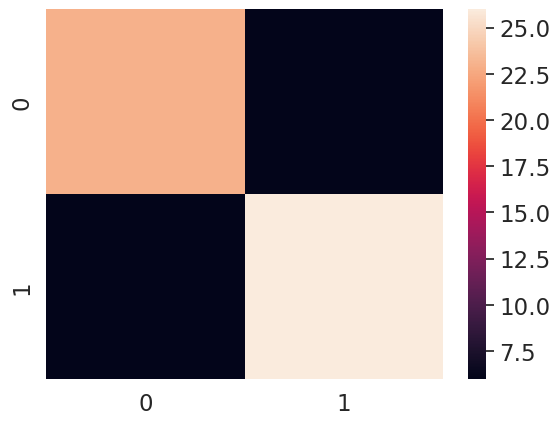

In [120]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(yte, predy)

# Plot it using Seaborn
sns.heatmap(conf_mat);

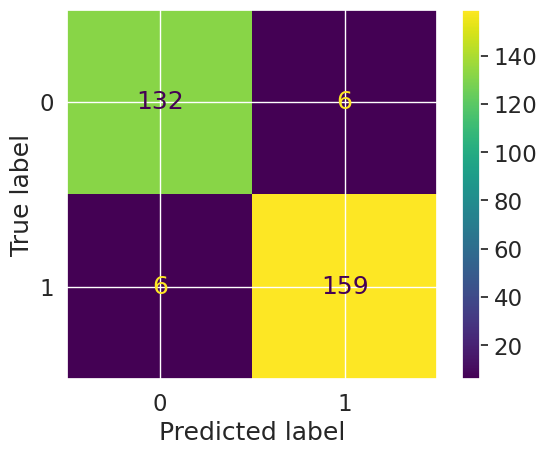

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

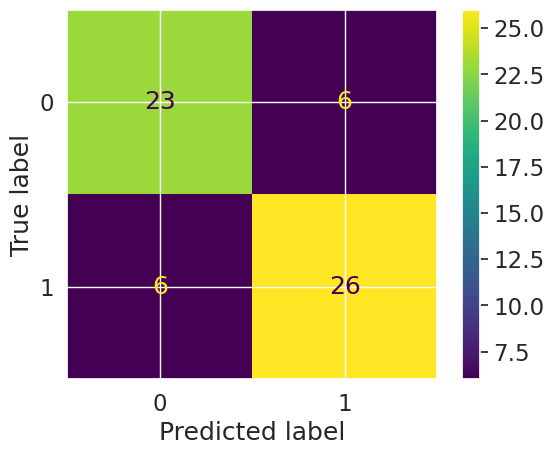

In [122]:
ConfusionMatrixDisplay.from_predictions(y_true=yte, y_pred=predy);

In [123]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(clf, X, y)

### Classification Report 

In [124]:
from sklearn.metrics import classification_report

print(classification_report(yte, predy))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [125]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only 1 positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds,  output_dict=True ))

/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [126]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X =home.drop("target", axis =1)
y= home.target

xtr, xte ,ytr, yte = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(xtr, ytr)


RandomForestRegressor()

In [127]:
model.score(xte, yte)

0.8066196804802649

In [128]:
from sklearn.metrics import r2_score

# Fill an array y_test mean
myte = np.full(len(yte), yte.mean())


In [129]:
myte[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [130]:
r2_score(y_true=yte, y_pred=myte) 

0.0

In [131]:
r2_score(y_true= yte, y_pred= yte)

1.0

# Mean Absolute error (MAE)
MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [132]:
# MEA
from sklearn.metrics import mean_absolute_error

pred= model.predict(xte)
mae= mean_absolute_error(yte, pred)
mae


0.3265721842781009

In [133]:
df = pd.DataFrame(data={"actual values": yte,
                       "Predicted values": pred})
df["difference"] = df["Predicted values"]- df["actual values"]
df.head()

,actual values,Predicted values,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [134]:
# MAE using folmula and difference
np.abs(df["difference"]).mean()

0.3265721842781009

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [135]:
import math
np.square(df["difference"])

20046    0.000284
3024     0.088173
15663    0.005100
20484    0.125521
9814     0.200919
           ...   
15362    0.170255
16623    0.518746
18086    0.026775
2144     0.000027
3665     0.026899
Name: difference, Length: 4128, dtype: float64

In [136]:
# Mean Square error
from sklearn.metrics import mean_squared_error
pred = model.predict(xte)
mse = mean_squared_error(yte, pred)
mse

0.2534073069137548

In [137]:
df["squared_difference"] = np.square(df["difference"])
df

,actual values,Predicted values,difference,squared_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [138]:
# Calculate MSE by hand
squared = np.square(df["difference"])
squared.mean()

0.2534073069137548

In [139]:
dfl = df.copy()
dfl.iloc[0]["squared_difference"] = 16

/tmp/ipykernel_177797/925898552.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfl.iloc[0]["squared_difference"] = 16


In [140]:
dfl.head()

,actual values,Predicted values,difference,squared_difference
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [141]:
# Calculate MSE with large error
dfl["squared_difference"].mean()

0.25728320720794084

### 4.2.3 Finally using the `scoring` parameter

In [142]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heartd.drop("target", axis=1)
y = heartd.target

clf = RandomForestClassifier()

In [143]:
np.random.seed(42)

# cross validation accuracy
cv = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [144]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [145]:
np.random.seed(42)

# cross validation accuracy
cv = cross_val_score(clf, X, y, cv=5, scoring="accuracy") # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [146]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [147]:
np.random.seed(42) 
# Precision
cvp = cross_val_score(clf, X, y, scoring="precision" )
cvp

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [148]:
# Cross-validated accuracy
print(f"The cross-validated precision is: {np.mean(cvp)*100:.2f}%")

The cross-validated precision is: 83.30%


In [149]:
np.random.seed(42) 
# Precision
cvr = cross_val_score(clf, X, y, scoring="recall" )
cvr

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [150]:
# Cross-validated accuracy
print(f"The cross-validated precision is: {np.mean(cvr)*100:.2f}%")

The cross-validated precision is: 85.45%


### `Scoring` prarameter for regression problem

In [151]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42) 

X = home.drop("target", axis =1)
y = home.target
reg = RandomForestRegressor()

In [152]:
# from sklearn.model_selection import cross_val_score
# np.random.seed(42)
# %time cv2 = cross_val_score(reg, X, y, scoring=None)
# %time np.mean(cv2)

In [153]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
%time cv2 = cross_val_score(reg, X, y,cv= 3, scoring=None)
%time np.mean(cv2)

CPU times: user 39.6 s, sys: 295 ms, total: 39.9 s
Wall time: 39.9 s
CPU times: user 97 µs, sys: 1 µs, total: 98 µs
Wall time: 103 µs


0.6545756342466266

In [154]:
cv2

array([0.62159677, 0.72076221, 0.62136792])

In [155]:
# Mean absolute error
from sklearn.model_selection import cross_val_score
np.random.seed(42)
%time cv_mae = cross_val_score(reg, X, y,cv= 3, scoring="neg_mean_absolute_error")
%time np.mean(cv_mae)

CPU times: user 37.3 s, sys: 300 ms, total: 37.6 s
Wall time: 37.6 s
CPU times: user 87 µs, sys: 1e+03 ns, total: 88 µs
Wall time: 90.1 µs


-0.4835493810852714

In [156]:
# Mean squared error
from sklearn.model_selection import cross_val_score
np.random.seed(42)
%time cv_mse = cross_val_score(reg, X, y,cv= 3, scoring="neg_mean_squared_error")
%time np.mean(cv_mse)

CPU times: user 31.7 s, sys: 216 ms, total: 31.9 s
Wall time: 31.9 s
CPU times: user 53 µs, sys: 1 µs, total: 54 µs
Wall time: 56.5 µs


-0.4613720134531419

In [157]:
cv_mae

array([-0.51752855, -0.4267802 , -0.50633939])

In [158]:
cv_mse

array([-0.51013593, -0.33368417, -0.54029594])

## 4.3 Using different evaluation metrics as Scikit-Learn functions  

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` modules

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X & y
X = heartd.drop("target", axis=1)
y = heartd.target

# Splitting
xtr, xte, ytr, yte = train_test_split(X, y , test_size=0.2)

# Training
clf = RandomForestClassifier()
clf.fit(xtr, ytr)

# Predict

pred = clf.predict(xte)
# Evaluating 
print("classifier metrics on test set")
print(f"Accuracy: {accuracy_score(yte,pred)*100:.2f}%")
print(f"Precision: {precision_score(yte,pred)}")
print(f"Recall: {recall_score(yte,pred)}")
print(f"F1 Score: {f1_score(yte,pred)}")

classifier metrics on test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615


In [160]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Create X & y
X = home.drop("target", axis=1)
y = home.target

# Splitting
xtr, xte, ytr, yte = train_test_split(X, y , test_size=0.2)

# Training
reg = RandomForestRegressor()
reg.fit(xtr, ytr)

# Evaluating 
pred = reg.predict(xte)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(yte, pred)}")
print(f"MAE: {mean_absolute_error(yte, pred)}")
print(f"MSE: {mean_squared_error(yte, pred)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


## 5. Improving a model 

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better) 
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [161]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [162]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [163]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
*  `n_estimators`

In [167]:
def evaluate(y_true, y_preds):
    # y_true vs prediction labels  || For classification
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 score: {f1:.2f}%")

    return metric_dict

In [171]:
# to shuffle and divide dataset into train,test, validate
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the heart disease data
sheartd = heartd.sample(frac=1)

# divide X & y
X = sheartd.drop("target", axis=1)
y= sheartd.target

# Split the data into train,test, validate
# Train split
trs = round(0.7* len(sheartd))
# Validation split
vas= round(trs + 0.15 * len(sheartd))
xtr, ytr  = X[:trs],y[:trs]
xva, yva = X[trs:vas], y[trs:vas]
xte, yte = X[vas:], y[vas:]

clf = RandomForestClassifier()
clf.fit(xtr, ytr)

# Make baseline prediction
pred = clf.predict(xva)

#Evaluate the classifier on the validation set
baseline_metrics = evaluate(yva, pred)
baseline_metrics

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 score: 0.85%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [175]:
np.random.seed(42)

# Create a second classifier with different hyperparameter
clf2 = RandomForestClassifier(max_depth=)
clf2.fit(xtr, ytr)

# predict
preds= clf2.predict(xva)

# Evaluate
clf2_metrics  = evaluate(yva, preds)

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 score: 0.85%


### Hyper paramter tuning with RandomizedSearcCV

In [180]:
## RandomizedSearchCV (Cross Validation)
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split X, y 
X = sheartd.drop("target", axis = 1)
y= sheartd.target

# Split train,test
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2) 

# Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=1)

# setup Randomized SearchCross Validation
rs = RandomizedSearchCV(estimator= clf,
                       param_distributions=grid,
                       n_iter=10, # number of models to try
                       cv =5,
                        verbose=3)

# Fit the RanRandomizedSearchCV version of clf
rs.fit(xtr, ytr);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.796 total time=   2.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.816 total time=   2.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.750 total time=   1.8s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.875 total time=   1.6s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200;, score=0.875 total time=   1.6s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=nan tot

/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/sid/projects/learning_stuff/ML/myenv/lib/python3.12/site-packages/sklearn/base.py", l

In [178]:
rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [192]:
# Make prediction with the best hyper parameters
rsp= rs.predict(xte)

# Evaluate the predicition 
rsm= evaluate(yte, rsp)

Acc: 81.97%
Precision: 0.77%
Recall: 0.86%
F1 score: 0.81%


# Hyper parameter tuning with grid search CV

In [183]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['sqrt','log2'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [212]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split X, y 
X = sheartd.drop("target", axis = 1)
y= sheartd.target

# Split train,test
xtr, xte, ytr, yte = train_test_split(X,y, test_size=0.2) 

# Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=1)

# setup Grid SearchCross Validation
gs = GridSearchCV(estimator= clf,
                       param_grid=grid_2,
                       cv =5,
                        verbose=3)

# Fit the GridSearchCV version of clf
gs.fit(xtr, ytr);

In [203]:
gs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [204]:
gsp = gs.predict(xte)
# elvaluate
gm = evaluate(yte, gsp)

Acc: 78.69%
Precision: 0.74%
Recall: 0.82%
F1 score: 0.78%


# let's compare different model metrics 

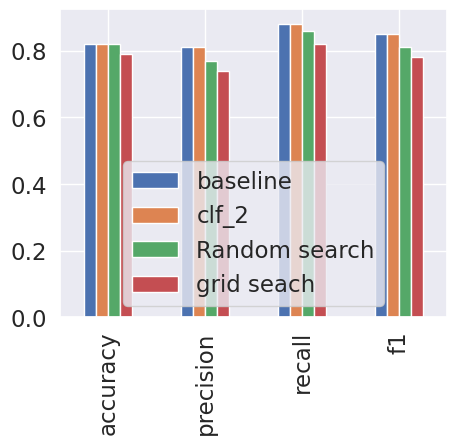

In [205]:
# Compare metrics
cm = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": clf2_metrics,
    "Random search" : rsm,
    "grid seach": gm
})

cm.plot.bar(figsize=(5,4));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [206]:
import pickle

# save existing model
pickle.dump(gs, open("gs_randomforestmodel1.pkl", "wb"))

In [207]:
# load a saved model
lpm = pickle.load(open("gs_randomforestmodel1.pkl", "rb"))

In [215]:
# Make some predictions 
# pickle y_prediction
pyp = lpm.predict(xte)
# Evaluate pickle model 
evaluate(yte, pyp)

Acc: 78.69%
Precision: 0.74%
Recall: 0.82%
F1 score: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [216]:
from joblib import dump, load

# Save model to file
dump(gs, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [217]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [219]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(xte)
evaluate(yte, joblib_y_preds)

Acc: 78.69%
Precision: 0.74%
Recall: 0.82%
F1 score: 0.78%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}